In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [1]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [2]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp0637178dGP2
Verbose mode active!


In [5]:
# load our larger toy dataset (1600 images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2_CTEXAMPLE/image_large.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2_CTEXAMPLE/mask_large.npy')

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [7]:
images.shape

(4800, 512, 512, 1)

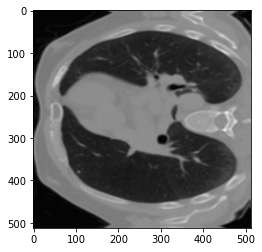

In [8]:
imshow(images[45], cmap= 'gray')

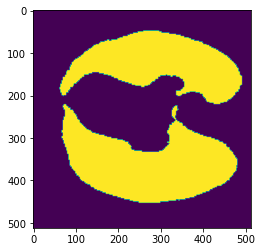

In [9]:
imshow(masks[45])

In [10]:
#
#
R.setup_data(images, masks, dataset_size=4800, weights=weights)
# R.setup_data(images, masks, dataset_size=4160)

Weights OK!


In [11]:
RUNS = 5

In [12]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(patience_counter=4)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
4/4 [==============================] - 29s 4s/step - loss: 1.0322 - dice_coeff: 0.5287 - val_loss: 1.4476 - val_dice_coeff: 0.3810
Epoch 2/100
4/4 [==============================] - 5s 2s/step - loss: 0.6945 - dice_coeff: 0.6543 - val_loss: 1.4003 - val_dice_coeff: 0.3783
Epoch 3/100
4/4 [==============================] - 5s 1s/step - loss: 0.5700 - dice_coeff: 0.7070 - val_loss: 1.3777 - val_dice_coeff: 0.3742
Epoch 4/100
4/4 [==============================] - 5s 1s/step - loss: 0.5187 - dice_coeff: 0.7299 - val_loss: 1.3539 - val_dice_coeff: 0.3715
Epoch 5/100
4/4 [==============================] - 5s 1s/step - loss: 0.4763 - dice_coeff: 0.7494 - val_loss: 1.3395 - val_dice_coeff: 0.3685
Epoch 6/100
4/4 [==============================] - 5s 2s/step - loss: 0.4490 - dice_coeff: 0.7622 - val_loss: 1.3294 - val_dice_coeff: 0.3656
Epoch 7/100
4/4 [==============================] - 5s 1s/step - loss: 0.4354 - dice_coeff: 0.7691 - val_loss: 1.3148 - val_dice_coeff: 0

5/5 [==============================] - 6s 1s/step - loss: 0.2300 - dice_coeff: 0.8703 - val_loss: 0.2276 - val_dice_coeff: 0.8748
Epoch 12/100
5/5 [==============================] - 6s 1s/step - loss: 0.2296 - dice_coeff: 0.8710 - val_loss: 0.2285 - val_dice_coeff: 0.8747
Epoch 13/100
5/5 [==============================] - 6s 1s/step - loss: 0.2285 - dice_coeff: 0.8697 - val_loss: 0.2271 - val_dice_coeff: 0.8748
Epoch 14/100
5/5 [==============================] - 6s 1s/step - loss: 0.2285 - dice_coeff: 0.8655 - val_loss: 0.2314 - val_dice_coeff: 0.8735
Epoch 15/100
5/5 [==============================] - 6s 1s/step - loss: 0.2297 - dice_coeff: 0.8691 - val_loss: 0.2228 - val_dice_coeff: 0.8775
Epoch 16/100
5/5 [==============================] - 6s 1s/step - loss: 0.2248 - dice_coeff: 0.8742 - val_loss: 0.2202 - val_dice_coeff: 0.8792
Epoch 17/100
5/5 [==============================] - 6s 1s/step - loss: 0.2223 - dice_coeff: 0.8743 - val_loss: 0.2184 - val_dice_coeff: 0.8795
Epoch 18/100

6/6 [==============================] - 7s 1s/step - loss: 0.1313 - dice_coeff: 0.9229 - val_loss: 0.1838 - val_dice_coeff: 0.9113
Epoch 23/100
6/6 [==============================] - 7s 1s/step - loss: 0.1280 - dice_coeff: 0.9257 - val_loss: 0.1728 - val_dice_coeff: 0.9158
Epoch 24/100
6/6 [==============================] - 7s 1s/step - loss: 0.1261 - dice_coeff: 0.9290 - val_loss: 0.1608 - val_dice_coeff: 0.9203
Epoch 25/100
6/6 [==============================] - 6s 1s/step - loss: 0.1248 - dice_coeff: 0.9260 - val_loss: 0.1479 - val_dice_coeff: 0.9223
Epoch 26/100
6/6 [==============================] - 7s 1s/step - loss: 0.1253 - dice_coeff: 0.9293 - val_loss: 0.1452 - val_dice_coeff: 0.9246
Epoch 27/100
6/6 [==============================] - 7s 1s/step - loss: 0.1219 - dice_coeff: 0.9313 - val_loss: 0.1495 - val_dice_coeff: 0.9241
Epoch 28/100
6/6 [==============================] - 7s 1s/step - loss: 0.1223 - dice_coeff: 0.9299 - val_loss: 0.1442 - val_dice_coeff: 0.9250
Epoch 29/100

6/6 [==============================] - 7s 1s/step - loss: 0.0498 - dice_coeff: 0.9702 - val_loss: 0.0900 - val_dice_coeff: 0.9594
Epoch 88/100
6/6 [==============================] - 7s 1s/step - loss: 0.0504 - dice_coeff: 0.9700 - val_loss: 0.0898 - val_dice_coeff: 0.9600
Epoch 89/100
6/6 [==============================] - 7s 1s/step - loss: 0.0489 - dice_coeff: 0.9709 - val_loss: 0.0918 - val_dice_coeff: 0.9600
Epoch 90/100
6/6 [==============================] - 7s 1s/step - loss: 0.0494 - dice_coeff: 0.9708 - val_loss: 0.0909 - val_dice_coeff: 0.9604
Epoch 91/100
6/6 [==============================] - 7s 1s/step - loss: 0.0486 - dice_coeff: 0.9707 - val_loss: 0.0911 - val_dice_coeff: 0.9604
Epoch 92/100
6/6 [==============================] - 7s 1s/step - loss: 0.0486 - dice_coeff: 0.9707 - val_loss: 0.0903 - val_dice_coeff: 0.9598
Epoch 93/100
6/6 [==============================] - 7s 1s/step - loss: 0.0470 - dice_coeff: 0.9718 - val_loss: 0.0891 - val_dice_coeff: 0.9608
Epoch 94/100

In [26]:
R.classifier_scores

[[0.2538498640060425, 0.861126720905304],
 [0.1684926450252533, 0.9117393493652344],
 [0.13273784518241882, 0.9316337704658508],
 [0.0906519889831543, 0.9620166420936584]]

In [27]:
R.discriminator_scores

[[2.6490903337617056e-07, 1.0],
 [0.014796210452914238, 0.9965277910232544],
 [0.024866409599781036, 0.9965277910232544],
 [11.62783432006836, 0.4826388955116272]]

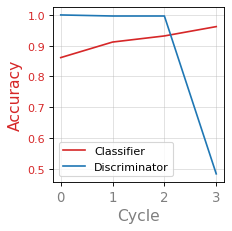

In [28]:
R.plot()

In [13]:
A_test = R.M.get('A_test')
A_test_pred = R.M.get('A_test_pred')

In [14]:
A_train = R.M.get('A_train')
C_train = R.M.get('C_train')

In [15]:
A_train_, A_train_ids = A_train.to_array()
C_train_, C_train_ids = C_train.to_array()

In [16]:
A_train_.shape, C_train_.shape

((362, 512, 512, 2), (1008, 512, 512, 3))

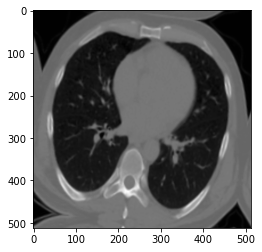

In [17]:
imshow(A_train_[4,:,:,0], cmap = 'gray')

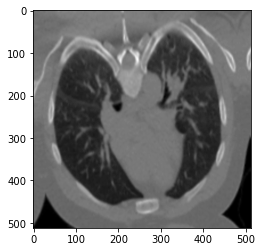

In [18]:
imshow(C_train_[14,:,:,0], cmap = 'gray')

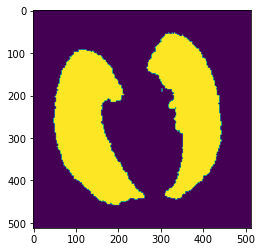

In [19]:
imshow(C_train_[14,:,:,1])

In [20]:
D = R.M.get('D')

D_, D_ids = D.to_array()
D_.shape
# D_images = D_[:,:,:,0]
# D_masks = D_[:,:,:,1]
# D_labels = D_[:,0,0,2]

(136, 512, 512, 3)

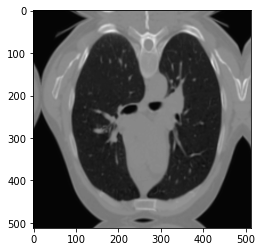

In [21]:
imshow(D_[14,:,:,0], cmap = 'gray')

In [22]:
A_test_images_only_, A_test_images_only_ids = A_test.to_array()
A_test_images_only_ = A_test_images_only_[:,:,:,0].astype(np.uint8)


A_test_pred_, A_test_pred_ids = A_test_pred.to_array()
A_test_pred_ = A_test_pred_.astype(np.uint8)

A_test_with_pred_ = np.stack((A_test_images_only_, A_test_pred_[:,:,:,0]), axis=-1)

In [23]:
A_test_with_pred_.shape

(1440, 512, 512, 2)

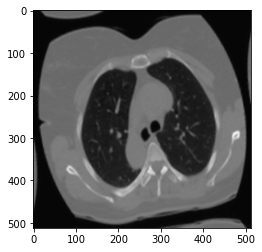

In [24]:
imshow(A_test_with_pred_[4,:,:,0], cmap='gray')

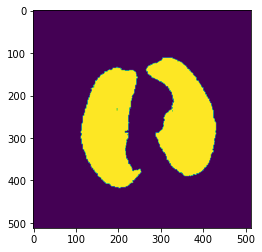

In [25]:
imshow(A_test_with_pred_[4,:,:,1])

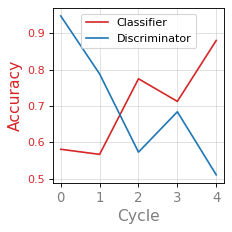

In [ ]:
# for i in range(0, images.shape[0], 4):
#     # plot the slice [:, :, 50]
#     plt.figure("check", (12, 6))
#     plt.subplot(1, 4, 1) 
#     plt.title(i)
#     plt.imshow(images[i], cmap = 'gray')
#     plt.subplot(1, 4, 2)
#     plt.title(i+1)
#     plt.imshow(images[i+1], cmap = 'gray')
#     plt.subplot(1, 4, 3)    
#     plt.title(i+2)
#     plt.imshow(images[i+2], cmap = 'gray')
#     plt.subplot(1, 4, 4)    
#     plt.title(i+3)
#     plt.imshow(images[i+3], cmap = 'gray')

#     plt.show()
#     plt.show()